In [ ]:
 from google.colab import drive
drive.mount("/content/drive", force_remount= True)

Mounted at /content/drive


In [ ]:
!pip install endaq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.9/95.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import endaq
import math
import scipy
import itertools
import operato

In [ ]:
#utils

def load_data(path, names = None, skip = 1):
  return (pd.read_csv(path))
                      #header = None,
                      #names = names,
                      #skiprows = skip))

def mag(df):
  return(np.sqrt(df["AccX(g)"] **2  + df["AccY(g)"] **2  + df["AccZ(g)"] ** 2))


def ft(x):
  coeff = np.fft.fft(x)
  return [np.real(coeff), np.imag(coeff), coeff]


## -- used if data is imported as strings --
def filter_str(val):
  return(isinstance(val, str))


def remove_str(df):
  return(df[~df.applymap(filter_str)])

## --

## Takes in the normalized PSD signal, finds peaks,
#locates frequencies associated with those peaks,
#returns the average of those peaks.
# average dominant frequency

def peaks(freq_arr, norm_array, h = 0.8, prom = 0.4):
  pks, _ = sp.signal.find_peaks(norm_array, height = h, prominence = prom) #returns indices of peaks
  freq_pks = freq_arr[pks] #contains frequencies associated with the peaks

  return np.mean(freq_pks)

def extract_time(data_frame):
  time = data_frame["time"]
  section = [time[i].split(" ")[1] for i in range(len(time))]
  sec = np.array([int(i.split(":")[-2]) for i in section])
  m_sec = np.array ([int(i.split(":")[-1]) for i in section])
  sec[1:] = sec[1:]-sec[:-1]
  sec[0] = 0
  m_sec[1:] = m_sec[1:]-m_sec[:-1]
  m_sec[0] = 0
  p = sec + 0.001*m_sec
  return list(it.accumulate(p, operator.add))


In [ ]:
df_CAM = load_data("/content/drive/MyDrive/DT20/Spring 24/Prototyping/PASS/Data Collection/2202024_Post_Excel/20240326214310.csv")

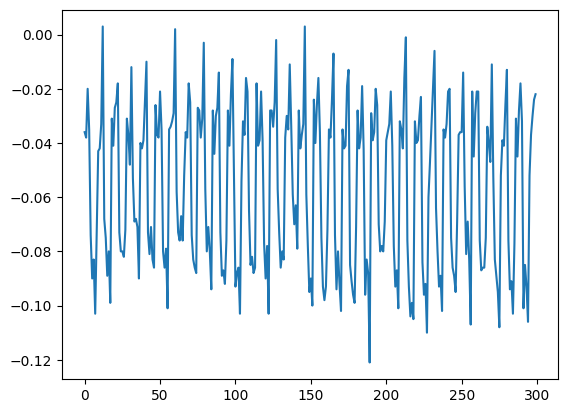

In [ ]:
plt.plot(df_CAM.index, df_CAM['AccX(g)'])

In [ ]:
import statistics
average=statistics.mean(mag(df_CAM))
print(average)
standard_deviation=statistics.stdev(mag(df_CAM))
print(standard_deviation)
times=[]
index=0
for i in mag(df_CAM):
  if i>(average+2*standard_deviation) or i<(average-2*standard_deviation):
    times.append(index)
  index+=1

1.001766873396986
0.008605903186719784


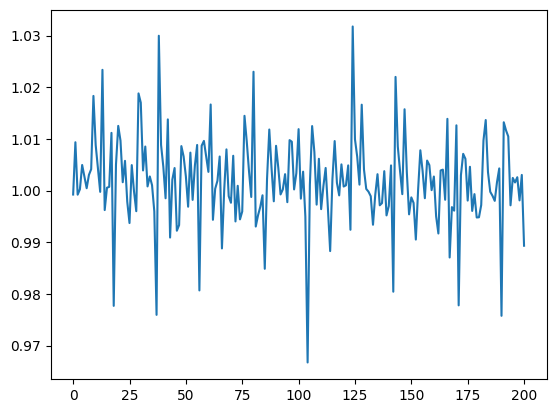

In [ ]:
filtered_df=df_CAM[(df_CAM.index<=200)]
plt.plot(filtered_df.index, mag(filtered_df))

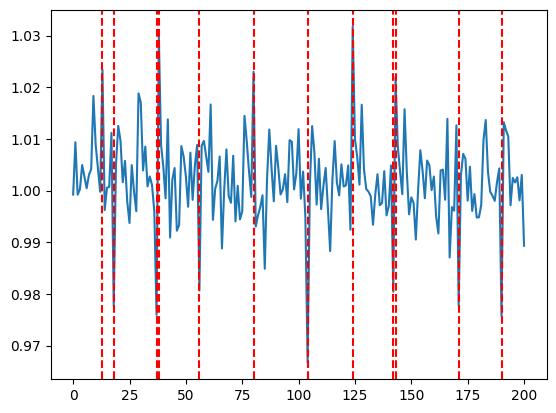

In [ ]:
filtered_df=df_CAM[(df_CAM.index<=200)]
plt.plot(filtered_df.index, mag(filtered_df))
filtered_times=list(filter(lambda x: x<=200, times))
for i in filtered_times:
  plt.axvline(x=i, color='r', linestyle='--')

In [ ]:
length=len(times)
for